In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [7]:
f = open("Data/Global_Hw/gap_hw.txt", "r")
dict_gaps = {}

for linea in f:

    list_gaps = []

    data = linea.split("_")
    values = data[1].split(" ")
    if len(values) >0 :
        for x in values:
            if (x != '\n') and (x != "") :
                list_gaps.append(float(x))
    dict_gaps[data[0]] = list_gaps
    
f.close()

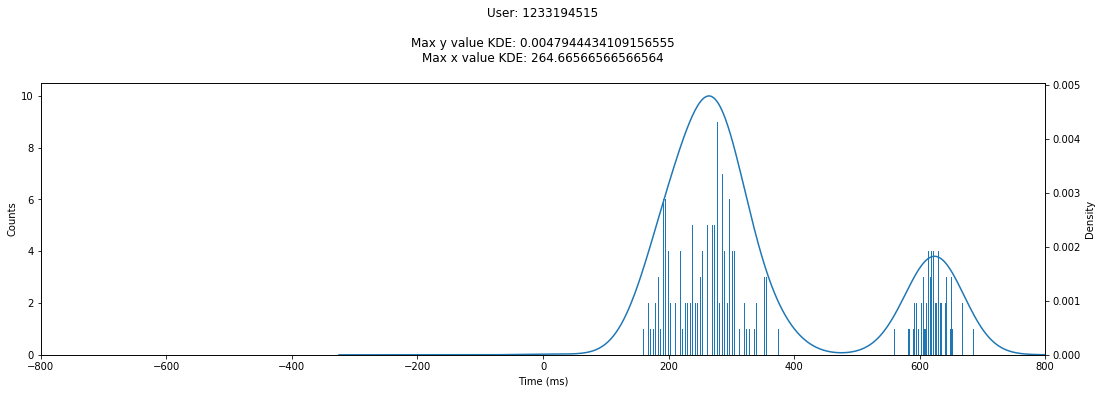

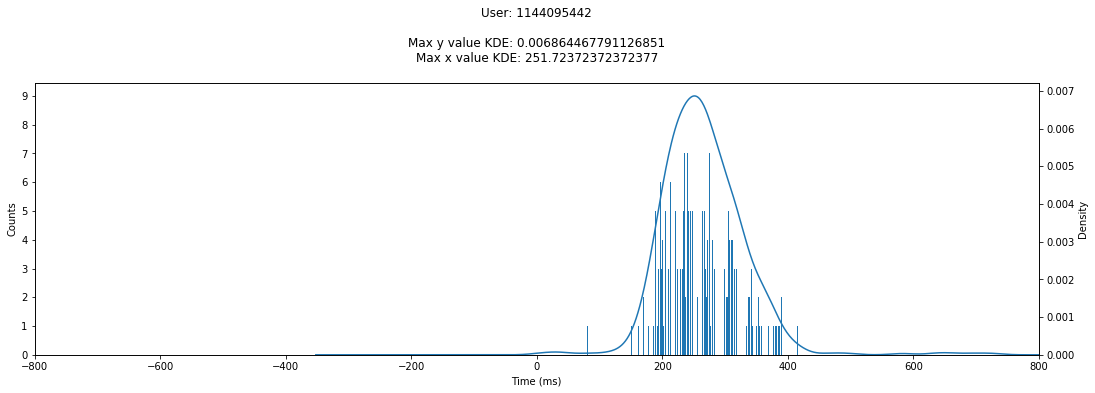

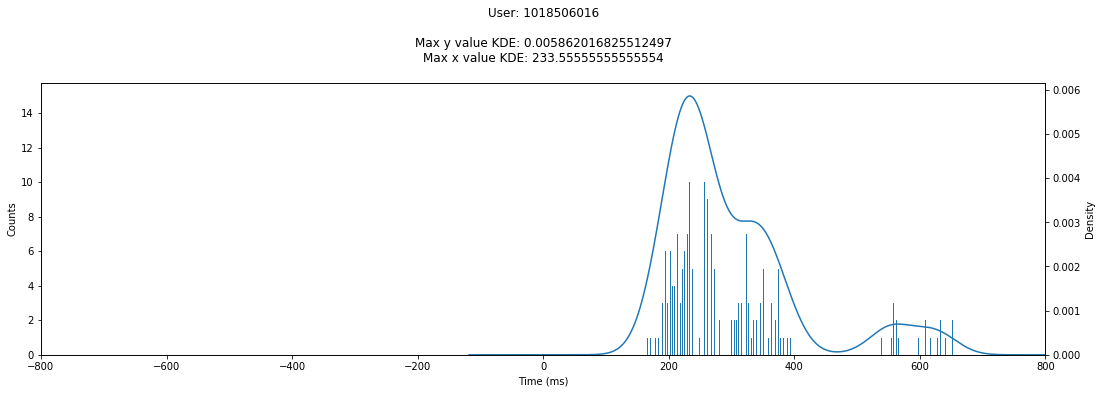

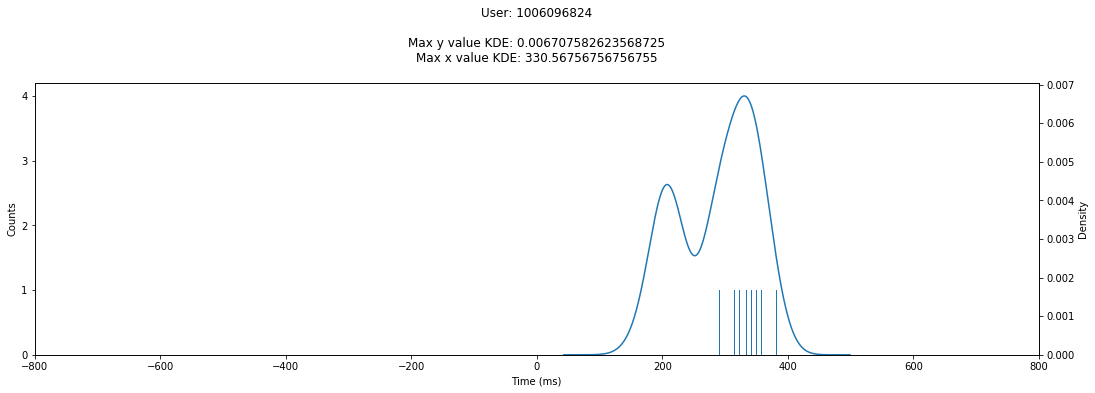

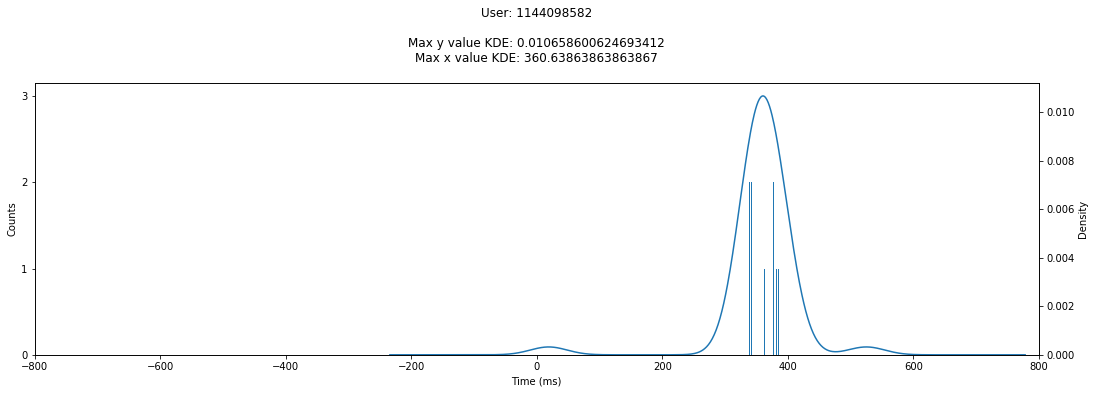

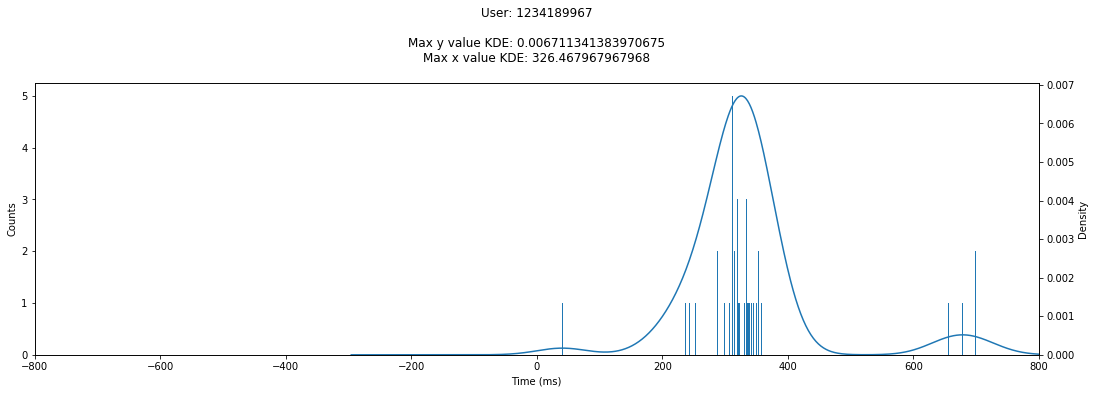

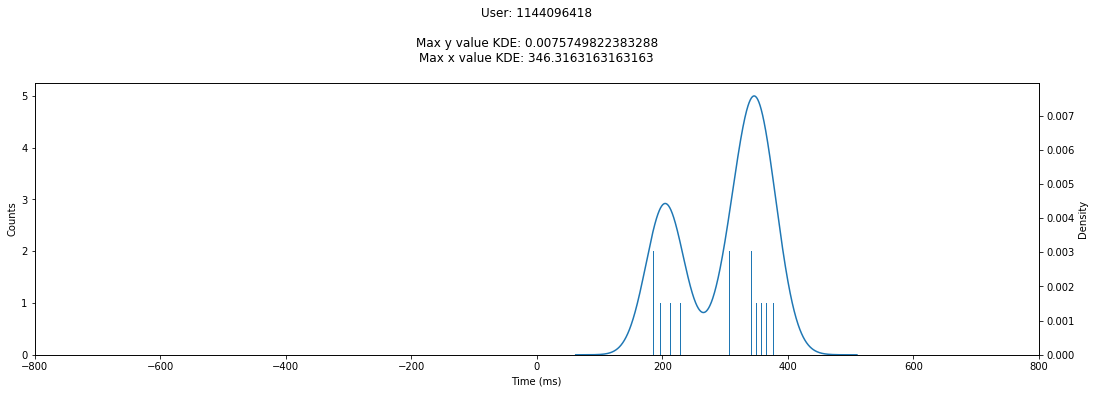

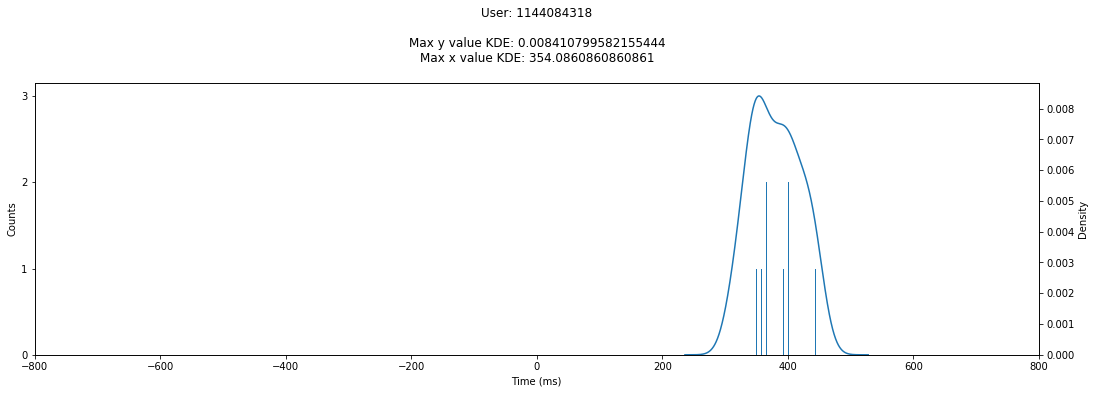

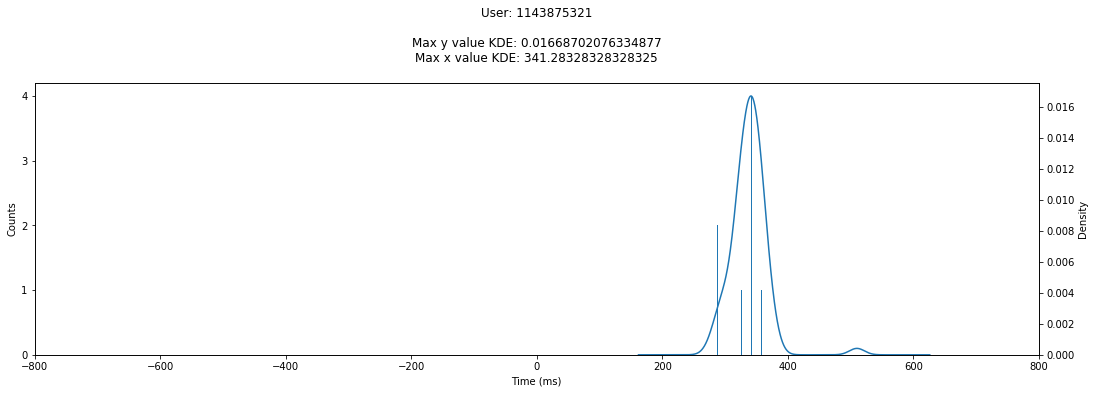

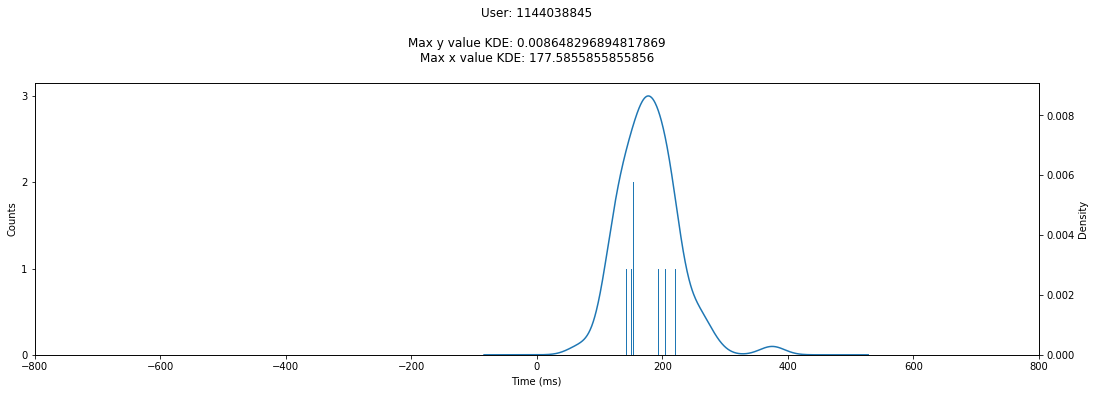

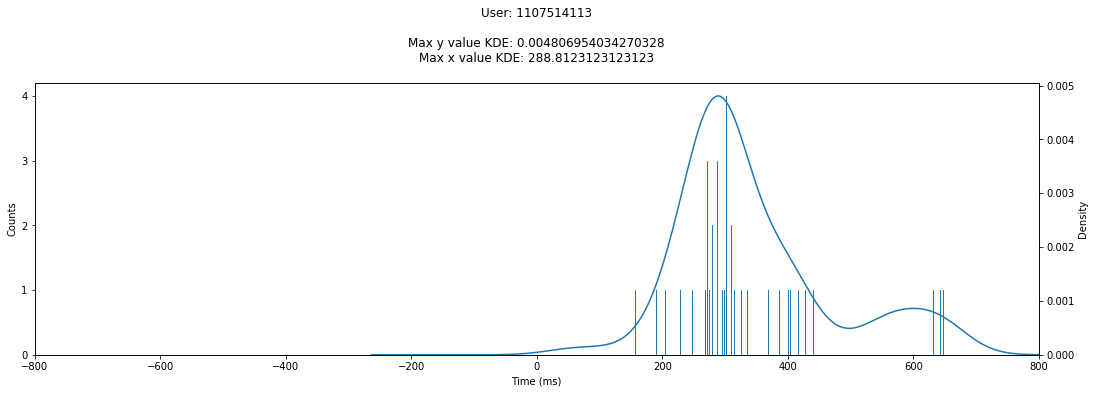

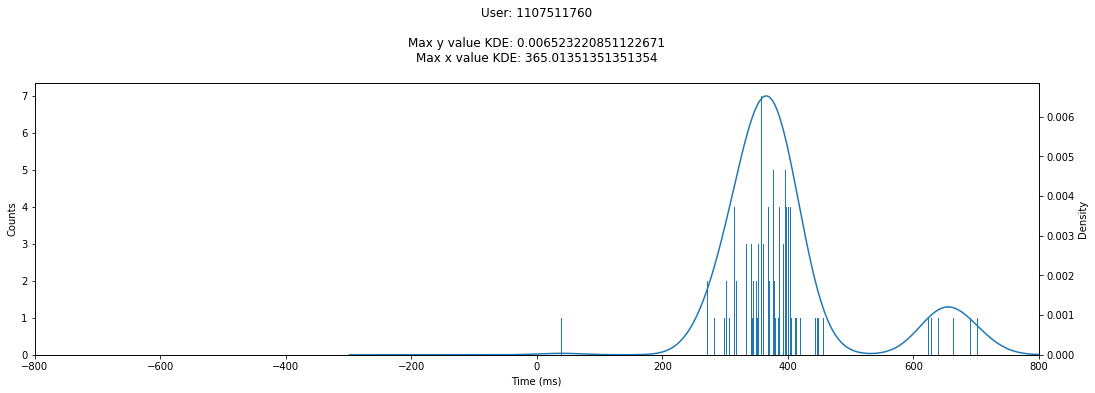

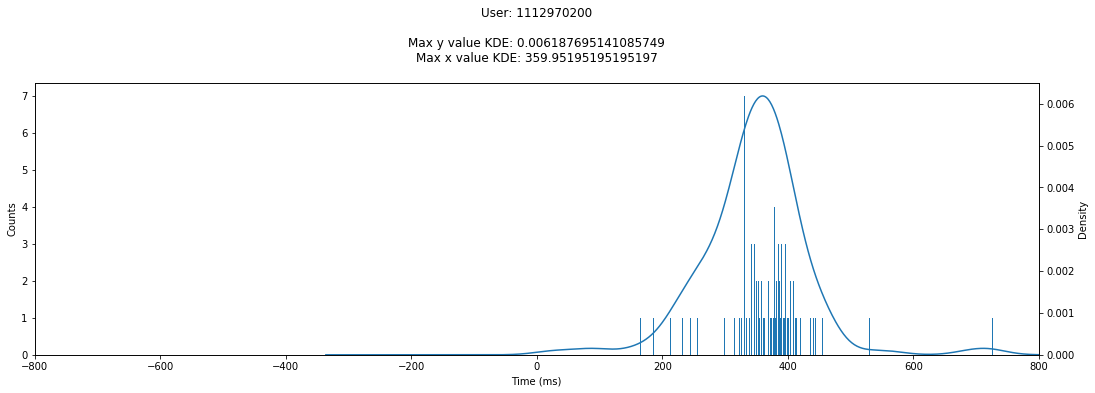

In [28]:
for user in dict_gaps:
    data = pd.DataFrame(dict_gaps[user])
    
    
    fig, ax1 = plt.subplots(1,1, figsize = (18,5))
    ax1.hist(dict_gaps[user], bins=1600)
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
   
    ax2 = ax1.twinx()
    
    
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Counts')
    ax1.set_xlim(right=800, left=-800)
    
    kde = data.plot(kind='kde', ax=ax2, secondary_y=False)
    ax2.set_ylim(bottom=0)
    ax2.get_legend().remove()
    
    
    array_kde_y = kde.get_children()[0]._y
    array_kde_x = kde.get_children()[0]._x
    
    max_inx = np.argmax(array_kde_y)
    max_kde_value_y = array_kde_y[max_inx]
    max_kde_value_x = array_kde_x[max_inx]
    
    plt.title("User: "+user+"\n"+"\n"+"Max y value KDE: "+ str(max_kde_value_y)+"\n"+"Max x value KDE: "+ str(max_kde_value_x)+"\n")
    plt.show()